<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Preberite datoteko wineReviews.csv in izpišite prve tri ocene vin.
import pandas as pd
df=pd.read_csv("wineReviews.csv", index_col=0, sep="\t")
df.head(3)

,country,description
wineId,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...
271,Greece,"Lively aromas of lemon, grapefruit and melon s..."
308,Greece,This fuller-bodied white blend offers pineappl...


In [2]:
#2. Izpišite iz katerih držav prihajajo ocenjena vina
# in koliko jih prihaja iz posamezne države.
df.groupby(['country']).count()

,description
country,
Croatia,73
Greece,466
Hungary,146
Slovenia,87


In [3]:
# 3. Združite ocene vseh slovenskih vin v skupno besedilo. To besedilo:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /root/nltk_data...
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
vsi_opisi= df[df["country"] == 'Slovenia']
example_slo = ' '.join(vsi_opisi['description'].astype(str))


In [8]:
# tokeniziraje in izpišite 8 tokenov, ki imajo najvišjo frekvenco pojavitve,
from nltk.tokenize import word_tokenize
from nltk.text import Text
seznam_tokeni = word_tokenize(example_slo) # tokenizacija besedila - dobimo seznam vseh tokenov
seznam_tokeni = [beseda.lower() for beseda in seznam_tokeni] # vse pretvorimo v male črke
seznam_tokeni[:8] # Izpišemo prvi 8 tokenov

['earthy', 'with', 'hints', 'of', 'roasted', 'nuts', 'and', 'dried']

,              232
and            224
.              193
of             184
the            126
with           101
a              99
this           83
flavors        63
is             62
it             58
in             55
on             53
aromas         52
finish         46


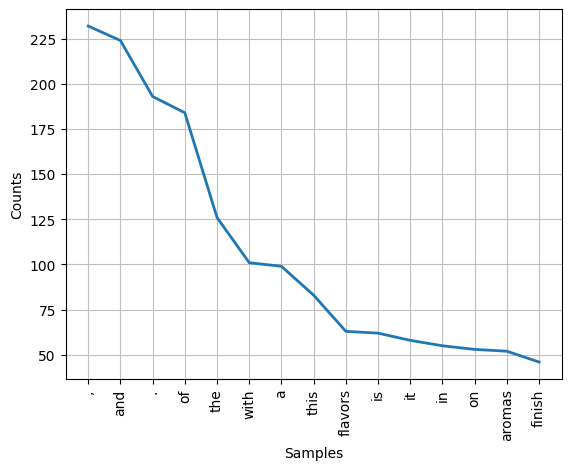

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
# izrišite graf, ki bo ponazoril, katerih 15 tokenov se
#     največkrat pojavi v oceni slovenskih vin,
from nltk import FreqDist
tokeni_freq = FreqDist(seznam_tokeni)

for beseda, pogostost in tokeni_freq.most_common(15):
    print("{w:<15}{f}".format(w=beseda, f=pogostost))

tokeni_freq.plot(15, cumulative=False)

In [10]:
# iz besedila odstranite vse "stop words" (besede brez pomena in ločila)
from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + list(string.punctuation) #združimo
tokeni_brez_stop = [token for token in seznam_tokeni if token not in stop_list]

tokeni_frekvenca_brez_stop = FreqDist(tokeni_brez_stop)

In [11]:
# ter izmed preostalih tokenov izpišite 5 takšnih, ki imajo najvišjo frekvenco pojavitve,
for word, freq in tokeni_frekvenca_brez_stop.most_common(5): #preverimo katere so zdaj tiste najpogostejše besede
    print("{w:<15}{f}".format(w=word, f=freq))

flavors        63
aromas         52
finish         46
wine           43
apple          35


In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokeni_stemm = [stemmer.stem(t) for t in tokeni_brez_stop ]
tokeni_frekvenca_stemm = FreqDist(tokeni_stemm)

for word, freq in tokeni_frekvenca_stemm.most_common(5):
    print("{w:<15}{f}".format(w=word, f=freq))

flavor         69
finish         54
aroma          53
wine           44
appl           36


In [13]:
# iz tako prečiščenega besedila izpišite 5 najpogostejših bigramov in trigramov.
from nltk import ngrams

dvojcki = FreqDist(ngrams(tokeni_stemm, 2))
for phrase, freq in dvojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('green', 'appl')             11
('ribolla', 'gialla')         11
('white', 'peach')            8
('mouth', 'flavor')           8
('black', 'cherri')           8
('red', 'raspberri')          7
('acid', "'s")                7
('aroma', 'freshli')          7
('lemon', 'grass')            7
('wine', 'aroma')             6


In [14]:
trojcki = FreqDist(ngrams(tokeni_stemm, 3))
for phrase, freq in trojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('aroma', 'freshli', 'mow')   4
('ribolla', 'gialla', 'aroma')4
('freshli', 'cut', 'grass')   4
('linger', 'long', 'finish')  4
('cherri', 'red', 'raspberri')3
('tangerin', 'acid', "'s")    3
('freshli', 'mow', 'grass')   3
('hazelnut', 'toast', 'almond')3
('100', 'ribolla', 'gialla')  3
('aroma', 'green', 'appl')    3


In [31]:
# 4. V datafram-u ustvarite nov stolpec poimenovan processed,
#kamor shranite besedilo ocen (description), ki je:
# v celoti zapisano z malimi črkami,
# brez "stop words" (besede brez pomena in ločila),
# besede morajo biti krnjene (nad njimi uporabite stemming).

vsi = df['description'].tolist()
processed = ' '.join(map(str, vsi))  # Join all descriptions into a single string

def predprocesiraj(besedilo):
    tokeni = word_tokenize(besedilo)
    seznam_lower = [beseda.lower() for beseda in tokeni]
    tokeni_brez_stop = [stemmer.stem(token) for token in seznam_lower if token not in stop_list]
    return ' '.join(tokeni_brez_stop)

processed = df['description'].apply(predprocesiraj)

In [39]:
# 5. S pomočjo TfidfVectorizer razdelite predprocesirana besedila ocen
 #(iz stolpca processed) na unigrame in
#izpišite koliko je vseh nastalih tokenov (features).
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vhod = vectorizer.fit_transform(processed) # Podamo že procesirano besedilo

# Get the unigram features
unigram_features = vectorizer.get_feature_names_out()

# Print the number of unigram features
print("Število unigram tokenov:", len(unigram_features))


Število unigram tokenov: 1725


In [40]:
# # 6. Nad tako pripravljenimi podatki uporabite klasifikacijski algoritem Support Vector Classification,
#  s katerim napoveste v katero državo sodi vino glede na besedilo podane ocene.
# Učna množica naj zajema 70% vseh podatkov, naključno stanje pa naj bo 789. Izpišite točnost klasifikacije.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=123)
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7801724137931034


In [41]:
#7. Enak postopek klasifikacije ponovite še nad bigrami in trigrami. Primerjajte točnosti klasifikacije.
#bigrami
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
vhod = vectorizer.fit_transform(processed)

x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=123)
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6637931034482759


In [43]:
#trigrami
vectorizer = TfidfVectorizer(ngram_range=(3, 3))  # Set ngram_range to (3, 3) for trigrams
x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=123)
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)



Accuracy: 0.6637931034482759


In [53]:
# 8. Za konec vzemite še neprečiščeno besedilo ocen iz stolpca description.
#  Predprocesirajte ga z uporabo TfidfVectorizer in ga razdelite na unigrame.
#  Nad njim izvedite klasifikacijo z enakim algoritmom, enako delitvijo učnih/testih podatkov,
#  in enakim izhodnim razredom kot v prejšnjih točkah. Točnost klasifikacije primerjajte s tisto iz 6. točke.
vhod2= df['description'].tolist()
izhod= df['country']

vectorizer = TfidfVectorizer(ngram_range=(1, 1), lowercase=True, stop_words=stop_list, preprocessor=predprocesiraj)

X_train, X_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)

# Initialize the Support Vector Classification (SVC) model
svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svc_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Točnost klasifikacije:", accuracy)


Točnost klasifikacije: 0.6379310344827587
